In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_/USDJPY_M15.csv', sep='\t')
df = df.rename(columns={'<CLOSE>': 'PrecoAtual',
                        '<TICKVOL>': 'Volume',
                        '<DATE>': 'Date'})
df.head()

,Date,<TIME>,<OPEN>,<HIGH>,<LOW>,PrecoAtual,Volume,<VOL>,<SPREAD>
0,2024.01.02,00:00:00,140.830,140.871,140.816,140.852,59,0,12
1,2024.01.02,00:15:00,140.857,140.935,140.857,140.885,108,0,5
2,2024.01.02,00:30:00,140.887,140.961,140.871,140.886,95,0,20
3,2024.01.02,00:45:00,140.886,140.901,140.858,140.881,90,0,22
4,2024.01.02,01:00:00,140.914,140.917,140.807,140.820,1279,0,10


In [3]:
df = df[['PrecoAtual', 'Volume']]

In [4]:
df['Media'] = df['PrecoAtual'].rolling(20).mean()

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 19 to 2303
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PrecoAtual  2285 non-null   float64
 1   Volume      2285 non-null   int64  
 2   Media       2285 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 71.4 KB


In [7]:

# Supondo que 'df' é seu DataFrame contendo as colunas 'PrecoAtual', 'Volume', 'Media'
# df = pd.read_csv('seu_arquivo_de_dados.csv')

In [11]:
# Pré-processamento dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df[['PrecoAtual', 'Volume', 'Media']])

In [13]:
scaled_features[0]

array([0.02876435, 0.0702293 , 0.        ])

In [16]:
sd = np.array(df)

In [18]:
sd[0]

array([ 141.559 , 1896.    ,  141.1717])

In [15]:
df.head()

,PrecoAtual,Volume,Media
19,141.559,1896,141.17170
20,141.529,1596,141.20555
21,141.655,1710,141.24405
22,141.597,1657,141.27960
23,141.498,1023,141.31045


In [19]:
# Preparar dados de entrada para LSTM

def create_dataset(X, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(X[i + time_steps, 0])  # Previsão do próximo preço
    return np.array(Xs), np.array(ys)


time_steps = 5
X, y = create_dataset(sd, time_steps)

In [20]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [21]:
# Criar o modelo LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(
        X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=200,
                    batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
52/52 [==============================] - 2s 10ms/step - loss: 6675.5205 - val_loss: 3674.7524
Epoch 2/20
52/52 [==============================] - 0s 4ms/step - loss: 2293.8181 - val_loss: 1337.1974
Epoch 3/20
52/52 [==============================] - 0s 4ms/step - loss: 863.8123 - val_loss: 856.3834
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 553.4746 - val_loss: 354.1045
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 325.6227 - val_loss: 230.3392
Epoch 6/20
52/52 [==============================] - 0s 4ms/step - loss: 253.5419 - val_loss: 208.7163
Epoch 7/20
52/52 [==============================] - 0s 4ms/step - loss: 190.3815 - val_loss: 160.6659
Epoch 8/20
52/52 [==============================] - 0s 4ms/step - loss: 159.8602 - val_loss: 106.2423
Epoch 9/20
52/52 [==============================] - 0s 4ms/step - loss: 118.3171 - val_loss: 80.2003
Epoch 10/20
52/52 [==============================] - 0s 4ms/step - loss: 97.56

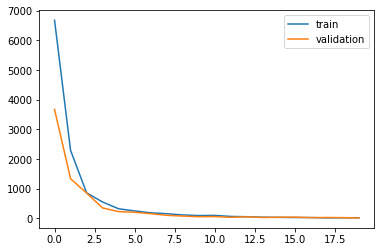

In [23]:
# Avaliar o modelo
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [24]:
# Fazer previsões
predicted_prices = model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [25]:
predicted_prices

array([[147.62125],
       [144.31125],
       [148.11679],
       [142.8641 ],
       [145.44319],
       [147.26067],
       [146.28766],
       [148.28606],
       [150.3945 ],
       [146.76645],
       [147.3667 ],
       [145.41248],
       [149.1748 ],
       [150.15674],
       [150.37782],
       [147.59932],
       [146.88258],
       [145.20418],
       [151.22205],
       [148.85632],
       [141.96036],
       [148.31607],
       [148.3694 ],
       [152.66544],
       [148.468  ],
       [146.30663],
       [151.51685],
       [144.47134],
       [151.20224],
       [145.15381],
       [142.49753],
       [149.81021],
       [146.69995],
       [147.53375],
       [144.95267],
       [148.37704],
       [148.23083],
       [140.46188],
       [147.31512],
       [145.49313],
       [149.58562],
       [151.82626],
       [145.27031],
       [145.07979],
       [143.65298],
       [143.79565],
       [136.48758],
       [141.91446],
       [148.51692],
       [144.36676],


In [27]:
# Reverter a normalização para os preços reais
predicted_prices = scaler.inverse_transform(predicted_prices)

ValueError: non-broadcastable output operand with shape (456,1) doesn't match the broadcast shape (456,3)